## Parse results from algos

In [1]:
import numpy as np
import numba as nb
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../src/')
import networkx as nx

In [2]:
import io_m.libsaving as libsaving
import io_m.io_utils as io_utils

from importlib import reload

In [3]:
from epigen import epidemy_gen

In [4]:
from epigen import EpInstance

In [ ]:
type_graph="RRG"
#seed=7
seed=8
N=100
d=10
height=3
lam=0.035
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.6,0.4]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=1

gamma=None
small_lambda_limit=0
path_contacts=" "

In [ ]:
### NEW RRG (changed the test probabilities)
type_graph="RRG"
#seed=7
seed=8
N=100
d=10
height=3
lam=0.035
#lam=0.038
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.4, 0.5, 0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=1
last_time_obs=False

gamma=None
small_lambda_limit=0
path_contacts=" "
scale=None

seeds=range(1,101)


In [ ]:
### NEW RRG with 2 src last obs
CASE="RRG with 2 src last obs"
type_graph="RRG"
#seed=7
seed=5
N=100
d=10
height=3
lam=0.03
#lam=0.038
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.4, 0.5, 0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=2

gamma=None
small_lambda_limit=0
path_contacts=" "
scale=None

last_time_obs=True

seeds=range(0,101)

In [5]:
### NEW RRG with 1 src last obs
type_graph="RRG"
#seed=7
seed=5
N=100
d=10
height=3
lam=0.035
#lam=0.038
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.4, 0.5, 0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=1

gamma=None
small_lambda_limit=0
path_contacts=" "
scale=None
CASE="RRG with 1 src last obs"

last_time_obs=True

seeds=range(0,101)

In [ ]:
type_graph="i_bird"
seed=9
N=100
d=10
height=3
lam=0.04
mu=0.02
t_limit=12
p_edge=1

gamma=1e-3
small_lambda_limit=0
path_contacts="../../results/patient_zero/work/work_13_contacts.npz"
#sparse observ
pr_sympt=0.5
#n_test_rnd=3
n_test_rnd=0
p_test_delay=[0, 0.6,0.4]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)

In [ ]:
type_graph="proximity"
CASE=f"{type_graph} with 1 src last obs"

seed=9
N=100
d=10
lam=0.026
mu=0.
t_limit=15
p_edge=1

height=3

gamma=1e-3
small_lambda_limit=0
path_contacts="../../results/patient_zero/work/work_13_contacts.npz"
#sparse observ
pr_sympt=0.5
nsrc=1

scale=2
#n_test_rnd=3
n_test_rnd=1
p_test_delay=[0, 0.2, 0.5,0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
seeds=range(0,100)

last_time_obs=True

In [ ]:
type_graph="proximity"
CASE=f"{type_graph} with 1 src last obs 2nd try"

seed=9
N=100
d=10
lam=0.03
mu=0.
t_limit=15
p_edge=1

height=3

gamma=1e-3
small_lambda_limit=0
path_contacts="../../results/patient_zero/work/work_13_contacts.npz"
#sparse observ
pr_sympt=0.5
nsrc=1

scale=2
#n_test_rnd=3
n_test_rnd=1
p_test_delay=[0, 0.2, 0.5,0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
seeds=list(range(0,104))
for s in range(15,20):
    seeds.remove(s)

last_time_obs=True

In [ ]:
#seeds = range(1,101)
#seeds =range(0,101)
#seeds=range(1,51)
# list(range(1,20))+list(range(30,51))

#seeds=range(0,80)

# for RRG 2 src last obs
#seeds=list(seeds)
#seeds.remove(29)

In [6]:
INSTANCES = {s: EpInstance(type_graph, N, d, t_limit, 
                                    lam, mu, s, float(p_edge), 
                                    n_source=nsrc) for s in seeds}

In [7]:
str(INSTANCES[1])

'RRG_n_100_d_10_tlim_15_lam_0.035_mu_0_s_1_pe_1.0'

In [8]:
extra_gen = {"h":height,
            "scale":scale}

extra_gen.update({"gamma":gamma, 
                  "small_lambda_limit":small_lambda_limit, 
                  "path_contacts": path_contacts})

In [9]:

num_conf=1
start_conf=0

In [10]:
%%capture
reload(epidemy_gen)
DATA_ALL = {s: 
            epidemy_gen.epidemy_gen_epinstance(inst, 
                                               lim_infected=1, num_conf=num_conf,
                                               extra_gen=extra_gen, 
                                               verbose=False,
                                              num_sources=nsrc) 
            for s, inst in INSTANCES.items()}

In [11]:
confs={s: np.array(mdata["test"]) for s, mdata in DATA_ALL.items()}

final_confs = {
    s: c[...,1,:] for s, c in confs.items()
} #np.stack(tuple(confs.values()) )[...,1,:]


idx_source = {k: np.stack((np.where(c[0]==1)[0] for c in x)) for k, x in confs.items()}

/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


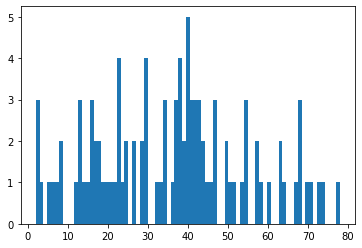

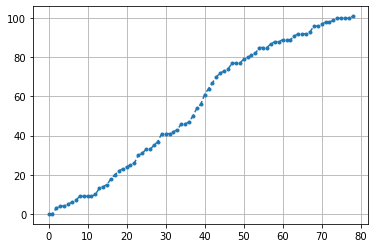

In [12]:
r = np.stack(tuple(final_confs.values())).sum(-1).flatten()
plt.figure()
plt.hist(r,bins=max(r)+1)

plt.figure()
x,vals = np.unique(r, return_counts=True)
allvals = np.zeros(max(x)+1)
allvals[x] = vals
plt.plot(allvals.cumsum(),".--")
plt.grid()

In [13]:
from io_m import read_results

from epigen import generators

from analysis import risk_pred

from epigen import gen_observ

In [14]:
if last_time_obs:
    test_gen = lambda dat, t, s: gen_observ.make_sparse_obs_last_t(
                                            dat,t, pr_sympt,seed=s,
                                               verbose=False, numeric_obs=True)
else:
    test_gen = lambda dat, t, s: gen_observ.make_sparse_obs_default(
                        dat, t, n_test_rnd,
                        seed=s,
                        pr_sympt=pr_sympt, 
                        p_test_delay=p_test_delay, 
                    verbose=False, numeric_obs=True)

test_gen, last_time_obs

(<function __main__.<lambda>(dat, t, s)>, True)

In [15]:
len(DATA_ALL)

101

In [16]:
EPIDEMIES = {s: generators.calc_epidemies(mdata["epidemy"], mdata["test"], t_limit) 
             for s, mdata in DATA_ALL.items()}
"""
rdf, rjson = gen_observ.make_sparse_obs_default(mdata, INSTANCE.t_limit, 
                                               n_test_rnd, pr_sympt, 
                                               p_test_delay,seed, False, numeric_obs=True)
"""
##LAST TIME

OBSERV_ALL = {s:
              test_gen(mdata, INSTANCES[s].t_limit, s=s,)[0] 
            for s, mdata in DATA_ALL.items()}

In [17]:
OBS_STATS = pd.concat([epidemy_gen.make_stats_observ(np.array(DATA_ALL[s]["test"]),
                                 OBSERV_ALL[s], obs_key="obs") 
 for s in sorted(DATA_ALL.keys())], ignore_index=True)

In [18]:
OBS_STATS["seed"] = seeds

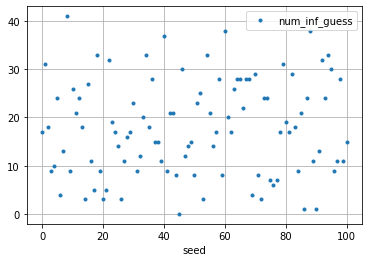

In [19]:
OBS_STATS.plot(x="seed",y=["num_inf_guess"], style=".")
plt.grid()

In [20]:
OBS_STATS[OBS_STATS.num_inf_guess < 2]

,num_inf,num_inf_obs,num_inf_guess,sources,seed
45,2,2,0,[34],45
86,2,1,1,[99],86
90,2,1,1,[26],90


## Read marginals

In [21]:
from io_m import read_results

In [22]:
def load_many_inst(method, folder, instances, *args, **kwargs):
    #if "legacy" in kwargs.keys():
    #    for inst in 
    return {s: method(folder, inst, *args,**kwargs) for s, inst in instances.items()}

In [23]:
margs_all = {}

In [24]:
reload(read_results)

<module 'io_m.read_results' from '../../src/io_m/read_results.py'>

In [25]:
for inst in INSTANCES.values():
    inst.p_edge=float(inst.p_edge)

In [26]:
confs_load=(0,1)

In [27]:
if not last_time_obs:
    name = f"{type_graph}_{n_test_rnd}rnd_" #psus06_"
else:
    name = f"{type_graph}_lastobs_"#psus06_"
print(name)
    
folder=f"sib/{type_graph}_{nsrc}src/"
#folder=f"sib/{INSTANCE.type_graph}_nsrc{nsrc}/"
name_psus06=name+"psus06_"
margs_all["sib_psus60"] =load_many_inst(read_results.read_sib_data_def,
                                        #"sib/{type_graph}_nsrc1/",
                                        f"sib/{type_graph}_{nsrc}src/",
                                        #f"sib/{type_graph}/",
                                        INSTANCES, height, name_psus06,
                                        range_confs=confs_load, outprint=False)

RRG_lastobs_


In [29]:
margs_all["sib_psus70_psrc2"] =load_many_inst(read_results.read_sib_data_def,
                                        #"sib/{type_graph}_nsrc1/",
                                        f"sib/{type_graph}_{nsrc}src/",
                                        #f"sib/{type_graph}/",
                                        INSTANCES, height, name+"psus07_psrc2_",
                                        range_confs=confs_load, outprint=False)

In [ ]:
margs_all["ann_psus06_lexp"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_SI",
                                        INSTANCES,
                                        prefix=f"10kst10ks_{n_test_rnd}rnd_6lexp_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        n_end=num_conf)

In [ ]:
instances_ann_1 = {k: INSTANCES[k] for k in filter(lambda x: x < 51, INSTANCES.keys())}
instances_ann_2 = {k: INSTANCES[k] for k in filter(lambda x: x >= 51, INSTANCES.keys())}

In [ ]:
for inst in instances_ann_1.values():
    inst.legacy(False)
margs_all["ann_psus06_4lpow"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_SI",
                                        INSTANCES,
                                        prefix=f"10kst10ks_{n_test_rnd}rnd_4lpow2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load)
for inst in instances_ann_1.values():
    inst.legacy(True)

## ANN RRG 1 src last obs

In [ ]:
margs_all["ann_psus06_4lpow"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [30]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix="10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

## ANN RRG 2 src last obs

In [ ]:
margs_all["ann_psus06_4lpow"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [ ]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [ ]:
CASE

In [ ]:
margs_all.keys()

## ANN proximity 1 src last obs

In [ ]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

## Read risks from estimators

In [31]:
reload(read_results)
risks_all = {}

In [32]:
if last_time_obs:
    name_rankers=f"lastobs_tau4_d10_"
else:
    name_rankers=f"{n_test_rnd}rnd_tau4_d10_"
print(name_rankers)

lastobs_tau4_d10_


In [33]:
risks_all["MF"] = load_many_inst(read_results.read_risk_inst,
                                 #f"rankers/good_new/{type_graph}",
                                 f"rankers/good/{type_graph}_{nsrc}src",
                                            INSTANCES, "MF",
                                            prefix=name_rankers,
                                            range_confs=confs_load, outprint=False)

In [34]:
risks_all["CT"] = load_many_inst(read_results.read_risk_inst,
                                 #f"rankers/good_new/{type_graph}",
                                 f"rankers/good/{type_graph}_{nsrc}src",
                                            INSTANCES, "CT",
                                            prefix=name_rankers,
                                            range_confs=confs_load, outprint=False)

In [35]:
def calc_all_rocs(margs, fin_conf, obs_all_df, instance):
    margs_diff =[]
    for i, conf_fin in enumerate(fin_conf):
        nidx = get_obs_idx(obs_all_df[i])
        sel_idx = set(range(instance.n)).difference(nidx)
        errs = get_err_rocs(margs[i], sel_idx, conf_fin)
        margs_diff.append(np.array(errs))
        
    return margs_diff

## Aggregated things

In [36]:
Nfin = {k: np.stack(tuple(mar.values()))[...,-1,:].sum(-2).reshape(-1,3) for k,mar in margs_all.items()}

In [37]:
Ninit = {k: np.stack(tuple(mar.values()))[...,0,:].sum(-2).reshape(-1,3) for k,mar in margs_all.items()}

In [38]:
Nfin_real = np.stack([ [(fin_conf==i).sum(-1) for i in range(3)] 
                      for s, fin_conf in final_confs.items()],0).reshape(-1,3)

In [39]:
margs_all.keys()

dict_keys(['sib_psus60', 'sib_psus70_psrc2', 'ann_psus07_4lpow_psrc2'])

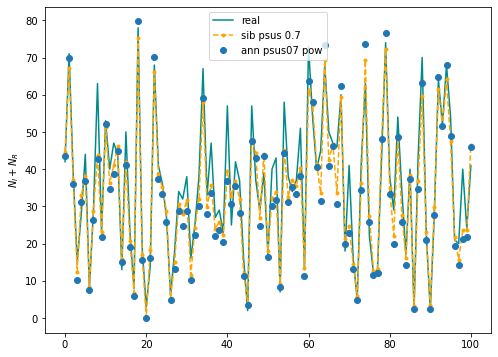

In [40]:
plt.figure(figsize=(8,6))

#plt.plot(margs_run[:,-1,1:].sum(-1),"--",label="10k steps mc -7 no netobs")
#plt.plot(margs_run_mc10[:,-1,1],"-",label="10k steps mc -10 no netobs")
plt.plot(Nfin_real[:,1:].sum(-1), label="real", color="darkcyan")
#plt.plot(Nfin["sib"][:,1:].sum(-1),".--",color="black",label="sib")
#plt.plot(Nfin["sib_psus60"][:,1:].sum(-1),".--",color="firebrick",label="sib psus 0.6")
plt.plot(Nfin["sib_psus70_psrc2"][:,1:].sum(-1),".--",color="orange",label="sib psus 0.7")
#plt.plot(Nfin["sib_psus65"][:,1:].sum(-1),".--",color="mediumpurple",label="sib psus 0.65")

#plt.plot(Nfin["ann_pfinLin"][:,1:].sum(-1),"o-",color="darkcyan",label="ann pfin Lin")

#plt.plot(Nfin["ann_psus06_lexp"][:,1:].sum(-1),"o",label="ann psus06 exp new")
#plt.plot(Nfin["ann_psus06_4lpow"][:,1:].sum(-1),"o",label="ann psus06 pow")
plt.plot(Nfin["ann_psus07_4lpow_psrc2"][:,1:].sum(-1),"o",label="ann psus07 pow")

#plt.plot(Nfin["ann_psus06_pow_nn"][:,1:].sum(-1),"o",label="ann psus06 pow new")


#plt.xlim((-0.2,))


plt.ylabel("$N_I + N_R$")
plt.legend()


In [41]:
aucs_all = {name: 
            np.array([
                risk_pred.calc_aucs(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s]) 
                 for s in sorted(INSTANCES.keys())
            ]).flatten()
            for name, margs in margs_all.items()}

/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [42]:
aucs_all.update({name: 
            np.array([
                risk_pred.calc_aucs_risks(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s]) 
                 for s in sorted(INSTANCES.keys())
            ]).flatten()
            for name, margs in risks_all.items()} )

/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


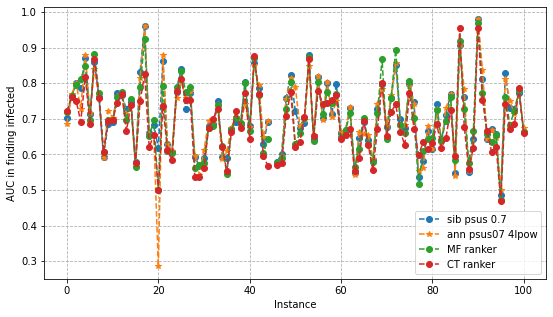

In [44]:
plt.figure(figsize=(9,5))
#plt.plot(aucs_all["sib"], "*--",label="sib", color="black")
#plt.plot(aucs_all["sib_psus60"], "o--",label="sib psus 0.6")
plt.plot(aucs_all["sib_psus70_psrc2"], "o--",label="sib psus 0.7")

#plt.plot(aucs_all["ann_psus06_lexp"],"*-",label="ann psus06 6lexp")

#plt.plot(aucs_all["ann_psus06_4lpow"],"o--",label="ann psus06 4lpow")
plt.plot(aucs_all["ann_psus07_4lpow_psrc2"],"*--",label="ann psus07 4lpow")



plt.plot(aucs_all["MF"], "o--", label="MF ranker")

#plt.plot(aucs_ranks["MF_cho"], "*--", label=f"MF ch_obs ranker")

plt.plot(aucs_all["CT"], "o--", label="CT ranker")
#plt.plot(aucs_ranks["CT_cho"], "*--", label="CT ch_obs ranker")
#plt.plot(aucs_all["ann_psus06_pow"],"*--",label="ann psus06 4lpow")


#plt.plot([1], [auc(rocs_1_m[0],rocs_1_m[1])], "o", label="big net")

plt.legend()
"""plt.xlim((-0.5,4.5))
plt.ylim((0.3
          ,0.83))"""
plt.ylabel("AUC in finding infected")
plt.xlabel("Instance")
plt.grid(linestyle="--")
#plt.savefig(f"auc_{str(INSTANCE)}.svg", bbox_inches="tight")

In [45]:
avg = {name: np.nanmean(r)
              for name, r in aucs_all.items()}
err_avg = {name: np.nanstd(r)/np.sqrt(len(r) - np.isnan(r).sum())
              for name, r in aucs_all.items()}

for k in sorted(avg.keys()):
    print(f"{k}: {avg[k]:5.3f} \pm {err_avg[k]:5.3f}")

CT: 0.685 \pm 0.009
MF: 0.703 \pm 0.010
ann_psus07_4lpow_psrc2: 0.707 \pm 0.010
sib_psus60: 0.708 \pm 0.009
sib_psus70_psrc2: 0.711 \pm 0.010


In [46]:
aucs_df =pd.DataFrame(aucs_all).dropna(how="all", axis=0)

In [47]:
len(aucs_df)

100

In [48]:
name_out=f"{type_graph}_n_{N}_{nsrc}src_"
if last_time_obs:
    name_out=name_out+f"lastobs_"
else:
    name_out=name_out+f"{n_test_rnd}rnd_"
print(name_out)

RRG_n_100_1src_lastobs_


In [50]:
aucs_df.to_csv("res_plot/"+name_out+"aucs.csv", index=False)

In [ ]:
#auc_data = pd.DataFrame(avg)
r =pd.concat((pd.Series(avg),pd.Series(err_avg)), axis=1, keys=["avg","err_avg"]
         )

r = r.set_index(np.array(["BP","ANN_4lpow","MF","CT"]))

In [ ]:
r

In [ ]:
res = aucs_df.agg(lambda x: (np.nanmean(x),
                       np.nanstd(x)/(np.prod(x.shape)- np.isnan(x).sum())))

In [ ]:
v = res.T

In [ ]:
len(v)

In [ ]:
fig, ax = plt.subplots()
x_pos=range(len(v))
ax.errorbar(x_pos, v[0], yerr=v[1], fmt="o")
ax.set_xticks(x_pos)
ax.set_xticklabels(v.index)

In [ ]:
v.index

In [ ]:
from analysis.generic import filter_nans, histo_points

pdfs_aucs = {name: histo_points(filter_nans(r), bins=200)
              for name, r in aucs_all.items()}
#del pdfs_aucs["ann_psus06_lexp"]
plt.figure(figsize=(8,6))
for k, dr in pdfs_aucs.items():
    plt.plot(dr[0],dr[1].cumsum()/dr[1].sum(), label=k)

plt.legend()


In [ ]:
probsi_margs = {name: 
            [
                risk_pred.get_probs_inf(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s],
                                       risk_pred.ResType.margs) 
                 for s in sorted(INSTANCES.keys())
            ]
            for name, margs in margs_all.items()}
sel_risk = {name: 
            [
                risk_pred.get_probs_inf(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s],
                                       risk_pred.ResType.risks) 
                 for s in sorted(INSTANCES.keys())
            ]
            for name, margs in risks_all.items()}

In [ ]:
len(sel_risk["MF"][3][0][0])

In [ ]:
def maxarrel(r, el=0):
    try:
        return max((len(f[0]) for f in r))
    except TypeError:
        print([(f[0]) for f in r])
        return (len(r[0]))
        #raise InterruptedError

In [ ]:
num_max = max([maxarrel(g) for g in sel_risk["MF"]])

In [ ]:
num_max = 0
for g in sel_risk["MF"]:
    for f in g:
        if num_max < len(f[0]):
            num_max = len(f[0])
            print(num_max)

In [ ]:
def count_found2(risk_i, nmax=None):
    #print(risk_i.shape)
    #g = np.stack(risk_i,1).astype(np.float_)
    idx = np.argsort(risk_i[0])[::-1]

    #g.view("f8,f8").sort(axis=0, order="f0")
    reu = risk_i[1][idx]
    if nmax is not None:
        res = np.zeros(nmax)
        #print(g[::-1][:10])
        res[:reu.shape[0]] = reu
        return res.cumsum()
    else:
        return reu.cumsum()

In [ ]:
normalize = lambda x: x/np.max(x)*100

In [ ]:
risks_all.keys()

In [ ]:
for inst in [1,2,3,4]:
    plt.figure(figsize=(7,5))
    for name,x in counted_probs.items():
        plt.plot(x[inst],"-", label=name)
    for name,x in counted_risk.items():
        plt.plot(x[inst],"-", label=name)
    plt.legend()
    plt.grid(linestyle="--")
    plt.title(f"Instance {inst}")

In [ ]:
def plot_roc(roc, *rargs, **kwargs):
    plt.plot(roc[0], roc[1], *rargs, **kwargs)

In [ ]:
for inst in [1,4]:
    plt.figure(figsize=(7,5))
    for name,x in rocs_all.items():
        plot_roc(x[inst],"-", label=name)
    for name,x in rocs_risks.items():
        plot_roc(x[inst],".-", label=name)
    plt.legend()
    plt.grid(linestyle="--")
    plt.title(f"Instance {inst} ROC")

In [ ]:
np.unique(sel_risk["CT"][0][0][0])

In [ ]:
len(sel_risk["CT"][0][0][0])

In [ ]:
TOT_POINTS = 1000
def count_found_all(risk_i, nmax=None):
    #print(risk_i.shape)
    #g = np.stack(risk_i,1).astype(np.float_)
    res_out = []
    vals = np.unique(risk_i[0])
    #if len(vals) < len(risk_i[0]):
    #    print("Have {} less values".format(len(risk_i[0])-len(vals)))
    #print(len(vals),len(risk_i), end="\t")
    for i in range(20):
        idx = np.argsort(risk_i[0])[::-1]

        #g.view("f8,f8").sort(axis=0, order="f0")
        count = risk_i[1][idx]

        nfind = len(count)

        points = np.linspace(1,TOT_POINTS, nfind)
        #discr_points = (points * TOT_POINTS).astype(int)
        resu = np.zeros(TOT_POINTS+1)

        resu[points.astype(int)] = count
    
        res_out.append(resu.cumsum())
    return np.stack(res_out).mean(0)
    
    

In [ ]:
normalize = lambda x: x/np.max(x)*100

In [ ]:
risks_all.keys()

In [ ]:
ninst=num_conf

mg = lambda x,y: [normalize(count_found_all(r,y)) for r in x[:ninst]]

In [ ]:
counted_probs = {
    name: [mg(r, num_max) for r in res] for name, res in probsi_margs.items() 
}

In [ ]:
counted_risk = {
    name: [mg(r, num_max) for r in res] for name, res in sel_risk.items() 
}

In [ ]:
counted_all ={}
counted_all.update(counted_probs)
counted_all.update(counted_risk)

In [ ]:
from sklearn.metrics import auc

aucs_find = {k: np.array([
                    [auc(np.linspace(0,1,len(x)), x/100) for x in v] 
                          for v in mar ]).flatten() for k,mar in counted_all.items()}

In [ ]:
labels={k: "${:4.3f} \pm {:4.3f}$".format(np.mean(x),np.std(x)/np.sqrt(np.prod(x.shape))) for k,x in aucs_find.items()}

In [ ]:
{k: (np.mean(x),np.std(x)) for k,x in aucs_find.items()}

In [ ]:
{k: np.quantile(x,[.1,.25,.5,.75,.9]) for k,x in aucs_find.items()}

In [ ]:
for k,x in aucs_find.items():
    plt.plot(np.quantile(x,[.1,.25,.5,.75,.9]),"+", label=k)
plt.legend()

In [ ]:
res_m = {name: np.stack(x).reshape(-1,TOT_POINTS+1).mean(0) for name,x in counted_all.items()}

In [ ]:
from sklearn.metrics import auc

auc_risk2 = {name: auc(np.linspace(0,1,len(x)),x/100) for name,x in res_m.items()}

In [ ]:
plt.figure(figsize=(8,6))
#for name,x in avg_count_probs.items():
#    plt.plot(x, label=name)
#    print()
#for name,x in avg_count_risk.items():
#    plt.plot(x, label=name)
#plt.plot(ul.mean(0))
x_data = np.linspace(0,100,TOT_POINTS+1)

#plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {:4.3f}".format(auc_risk2["sib_psus60"]))
plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {}".format(labels["sib_psus60"]))

#plt.plot(x_data, res_m["ann_psus06_lexp"], label="ANN, auc: {}".format(labels["ann_psus06_lexp"]))
plt.plot(x_data, res_m["ann_psus06_4lpow"], label="ANN pow, auc: {}".format(labels["ann_psus06_4lpow"]))

plt.plot(x_data, res_m["MF"], label="MF, auc: {}".format(labels["MF"]))
plt.plot(x_data, res_m["CT"], label="CT, auc: {}".format(labels["CT"]))
"""
plt.plot(x_data,res_m["ann_psus06_lexp"], label="ANN, auc: {:4.3f}".format(auc_risk2["ann_psus06_lexp"]))


plt.plot(x_data,res_m["MF"], label="MF, auc: {:4.3f}".format(auc_risk2["MF"]))
plt.plot(x_data,res_m["CT"], label="CT, auc: {:4.3f}".format(auc_risk2["CT"]))

"""

plt.legend()
plt.xlabel("Percentage of individuals tested")
plt.ylabel("Perc infected found on average")
plt.grid(linestyle="--")
plt.savefig(f"auc_infected_{type_graph}.svg",bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))
#for name,x in avg_count_probs.items():
#    plt.plot(x, label=name)
#    print()
#for name,x in avg_count_risk.items():
#    plt.plot(x, label=name)
#plt.plot(ul.mean(0))
x_data = np.linspace(0,100,TOT_POINTS+1)

#plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {:4.3f}".format(auc_risk2["sib_psus60"]))
plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {}".format(labels["sib_psus60"]))

plt.plot(x_data, res_m["ann_psus06_lexp"], label="ANN, auc: {}".format(labels["ann_psus06_lexp"]))
plt.plot(x_data, res_m["ann_psus06_pow"], label="ANN pow, auc: {}".format(labels["ann_psus06_pow"]))

plt.plot(x_data, res_m["MF"], label="MF, auc: {}".format(labels["MF"]))
plt.plot(x_data, res_m["CT"], label="CT, auc: {}".format(labels["CT"]))
"""
plt.plot(x_data,res_m["ann_psus06_lexp"], label="ANN, auc: {:4.3f}".format(auc_risk2["ann_psus06_lexp"]))


plt.plot(x_data,res_m["MF"], label="MF, auc: {:4.3f}".format(auc_risk2["MF"]))
plt.plot(x_data,res_m["CT"], label="CT, auc: {:4.3f}".format(auc_risk2["CT"]))

"""

plt.legend()
plt.xlabel("Percentage of individuals tested")
plt.ylabel("Perc infected found on average")
plt.grid(linestyle="--")
plt.savefig(f"auc_infected_{type_graph}.svg",bbox_inches="tight")

In [ ]:
alg = "ann_psus06_lexp"
plt.plot(counted_all[alg][0][0])
plt.plot(counted_all[alg][1][0])
plt.plot(counted_all[alg][2][0])
plt.plot(counted_all[alg][3][0])

## Patient zero

In [ ]:
sources = {s:
    np.stack( [np.where(np.array(c[0])==1)[0] for c in mdata["test"] ])
           for s, mdata in DATA_ALL.items()}

In [ ]:
from sklearn.metrics import auc, roc_curve

In [ ]:
def get_source_rank(m, msources):
    psources = m[:,0,1]
    idx=psources.argsort()[::-1]

    rg = sum(((idx == s for s in msources)))
    #print(rg)
    return rg.cumsum()

def get_sources_auc(m, msources):
    psources = m[:,0,1]
    idx=psources.argsort()[::-1]
    truey = np.zeros(psources.shape, dtype=int)
    #rg = sum(((idx == s for s in msources)))
    truey[msources] = 1
    #print(rg)
    fpr,tpr,thr= roc_curve(truey, psources)#rg.cumsum()
    return auc(fpr,tpr)

In [ ]:
pzero_accu = {name: 
            np.stack([
                np.array([get_source_rank(m,source) 
                          for m, source in zip(marg[s], sources[s])])
                for s in sources.keys()
            ]).sum(0).sum(0)
            for name, marg in margs_all.items()}

In [ ]:
pzero_auc = {name: 
            np.stack([
                np.array([get_sources_auc(m,source) for m, source in zip(marg[s], sources[s])])
                for s in sources.keys()
            ]).mean(-1)
            for name, marg in margs_all.items()}

In [ ]:
for k in sorted(pzero_auc.keys()):
    aal = pzero_auc[k]
    print("{}, {:4.3f} \pm {:4.3f} ".format(
        k, np.nanmean(aal), np.nanstd(aal)/np.sqrt(np.prod(aal.shape)-np.isnan(aal).sum()))
    )
    plt.plot(aal, label=k)
    
plt.legend()

In [ ]:
plt.figure(figsize=(7,5))
#for name,x in avg_count_probs.items():
#    plt.plot(x, label=name)
#    print()
#for name,x in avg_count_risk.items():
#    plt.plot(x, label=name)
#plt.plot(ul.mean(0))
x_data = np.arange(N)
#plt.plot(x_data,pzero_accu["sib_psus60"], "--",label="BP")
plt.plot(x_data,pzero_accu["sib_psus70_psrc2"], "--",label="BP psus07 psrc2")
#, auc: {:4.3f}".format(auc_risk2["sib_psus60"]))
l = "ann_"
#plt.plot(x_data,pzero_accu["ann_psus06_4lpow"], label="ANN")#, auc: {:4.3f}".format(auc_risk2["ann_psus06Fin"]))

plt.plot(x_data,pzero_accu["ann_psus07_4lpow_psrc2"], label="ANN psus07 psrc2")
#plt.plot(x_data,pzero_accu["ann_10kpsus06"],"--", label="ANN 10kst")#, auc: {:4.3f}".format(auc_risk2["ann_psus06Fin"]))

#plt.plot(x_data,pzero_accu["ann_10kst10ks"],"--", label="ANN 10kst 10ks")#, auc: {:4.3f}".format(auc_risk2["ann_psus06Fin"]))

#plt.plot(x_data,pzero_accu["ann_6kLayExp2"],"--", label="ANN 6kst exp 2")#, auc: {:4.3f}".format(auc_risk2["ann_psus06Fin"]))

#plt.plot(res_m["MF_cho"], label="MF cho, auc: {:4.3f}".format(auc_risk2["MF_cho"]))
#plt.plot(res_m["CT_cho"], label="CT cho, auc: {:4.3f}".format(auc_risk2["CT_cho"]))


plt.legend()
plt.ylabel("Sources found (cumulative)")
plt.xlabel("N individuals")
plt.grid(linestyle="--")

In [ ]:
pzero_counts_df = pd.DataFrame(pzero_accu)
pzero_counts_df.to_csv(name_out+"pzero_count.csv", index=False)

In [ ]:
pzero_counts_df = pd.DataFrame(pzero_auc)
pzero_counts_df.to_csv(name_out+"pzero_aucs.csv", index=False)

## Graph analysis

In [ ]:
Gtry = DATA_ALL[2]["G"]

In [ ]:
n_edges = len(nx.DiGraph(Gtry).edges)

In [ ]:
Gtry

In [ ]:
Gtry = nx.random_regular_graph(6, 50)
len(Gtry.nodes)

In [ ]:
nx.average_clustering(Gtry)

In [ ]:
idx = 44
neighs = tuple(Gtry.neighbors(idx))

neighs2 = {k:tuple(Gtry.neighbors(k)) for k in neighs}

neighs_f = {k:tuple(filter(lambda x : x in neighs, Gtry.neighbors(k)) ) for k in neighs}

In [ ]:
other_neighs = set()
for i in neighs:
    for j in neighs:
        if i==j: 
            continue
        res = set(neighs2[i]).intersection(neighs2[j])
        if len(res) > 0:
            other_neighs = other_neighs.union(res)

In [ ]:
comm_union = set()
for l in neighs2.values():
    comm_union = comm_union.union(l)

In [ ]:
len(comm_union)

In [ ]:
len(other_neighs)

In [ ]:
pos = nx.spring_layout(Gtry, iterations=1000,k=3, threshold=1e-5)

In [ ]:
nx.draw(Gtry,nodelist=list(filter(lambda x: x<idx,comm_union)), pos=pos)
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=[idx],node_color="red")
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=list(filter(lambda x: x<idx,neighs)),node_color="green")

In [ ]:
nx.draw(Gtry,nodelist=list(filter(lambda x: x<idx,other_neighs)), pos=pos)
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=[idx],node_color="red")
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=list(filter(lambda x: x<idx,neighs)),node_color="green")